Inceptionv3

In [1]:
#import modules
import numpy as np # linear algebra
import pandas as pd # data processing, CSV @ excel file I/O (e.g. pd.read_csv)
import tensorflow as tf
import cv2
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns

Path for normal, covid-19, TB
Grab all image files for every class

In [2]:
#define paths
normalpath = 'D:\\dataset300\\normal'
covidpath = 'D:\\dataset300\\covid'
tbpath = 'D:\\dataset300\\tb'

# Use glob to grab images from path .jpg or jpeg
normal_files = glob(normalpath + '/*')
covid_files = glob(covidpath + '/*')
tb_files = glob(tbpath + '/*')

In [3]:
#Store all images into a variable
allfiles = normal_files + covid_files + tb_files

In [4]:
print('There are %d normal cases.' % len(normal_files))
print('There are %d covid positive cases.' % len(covid_files))
print('There are %d tuberculosis positive cases.' % len(tb_files))

There are 300 normal cases.
There are 300 covid positive cases.
There are 300 tuberculosis positive cases.


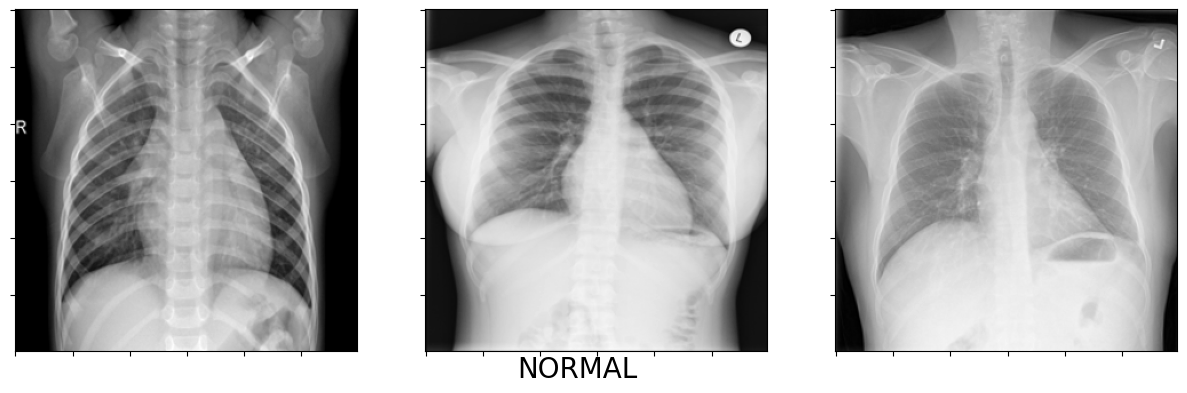

In [5]:
#show xray normal
f = plt.figure(figsize=(15,7))
f.suptitle('NORMAL',fontsize=20)
f.subplots_adjust(top=2.35)
for i in range(3):
    sp = f.add_subplot(1,3,i+1)
    img = cv2.imread(normal_files[i])
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    plt.tick_params(labelbottom=False,
                labelleft=False,
                labelright=False,
                labeltop=False)
    plt.imshow(img_gray)
    plt.gray()
plt.show()

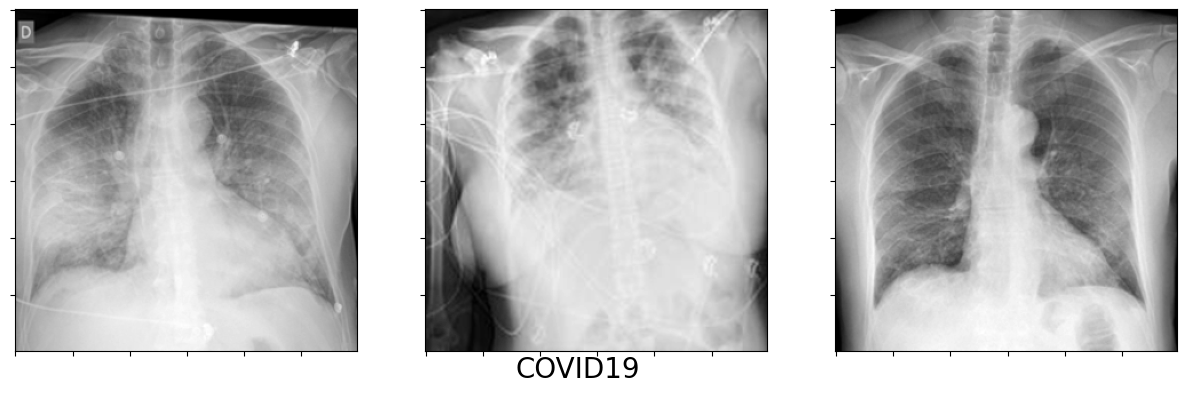

In [6]:
#show xray covid
f = plt.figure(figsize=(15,7))
f.suptitle('COVID19',fontsize=20)
f.subplots_adjust(top=2.35)
for i in range(3):
    sp = f.add_subplot(1,3,i+1)
    img = cv2.imread(covid_files[i])
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    plt.tick_params(labelbottom=False,
                labelleft=False,
                labelright=False,
                labeltop=False)
    plt.imshow(img_gray)
    plt.gray()
plt.show()

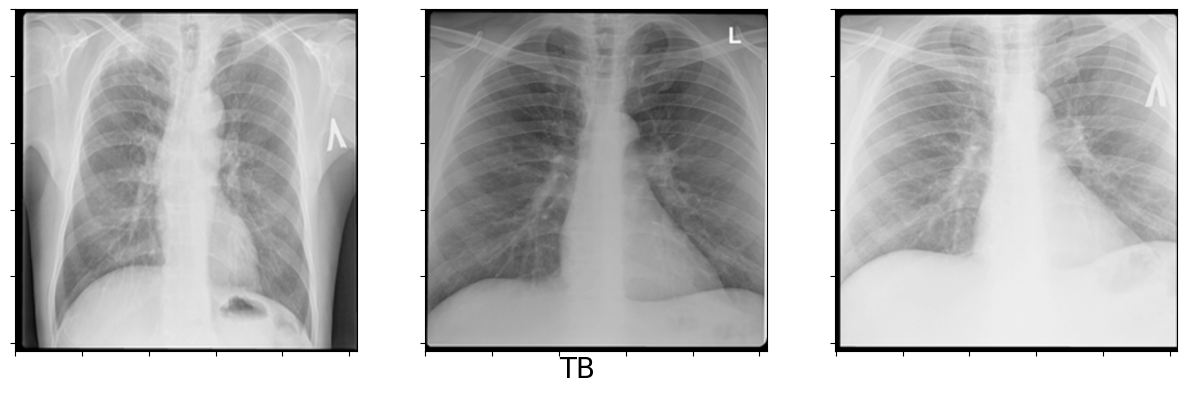

In [7]:
#show xray tb
f = plt.figure(figsize=(15,7))
f.suptitle('TB',fontsize=20)
f.subplots_adjust(top=2.35)
for i in range(3):
    sp = f.add_subplot(1,3,i+1)
    img = cv2.imread(tb_files[i])
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    plt.tick_params(labelbottom=False,
                labelleft=False,
                labelright=False,
                labeltop=False)
    plt.imshow(img_gray)
    plt.gray()
plt.show()

Preparing labels (0=NORMAL, 1=COVID19, 2=TB)

In [8]:
# Preparing Labels

import cv2

data = []
labels = []


for i in range(len(normal_files)):
  image = cv2.imread(normal_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  #image = cv2.resize(image,(180,180))
  image = cv2.resize(image,(224,224))
  data.append(image)
  labels.append(0) #atau mungkin kena letak num like 0

for i in range(len(covid_files)):
  image = cv2.imread(covid_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  #image = cv2.resize(image,(180,180))
  image = cv2.resize(image,(224,224))
  data.append(image)
  labels.append(1)

for i in range(len(tb_files)):
  image = cv2.imread(tb_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  #image = cv2.resize(image,(180,180))
  image = cv2.resize(image,(224,224))
  data.append(image)
  labels.append(2)

List of images for all classes

In [9]:
images = []
for i in range(len(normal_files)):
    normfile = normal_files[i]
    images.append(normfile)
for i in range(len(covid_files)):
    covfile = covid_files[i]
    images.append(covid_files)
for i in range(len(tb_files)):
    tbfile = tb_files[i]
    images.append(tb_files)

Create dataframe containing file name with labels of Xray_class

In [10]:
img_df = pd.DataFrame({'Image_name':allfiles, 'Xray_class': labels})

In [11]:
import numpy as np
from keras.applications import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.applications.inception_v3 import preprocess_input


Create model InceptionV3

In [12]:
base_model = InceptionV3(weights="imagenet")


In [13]:
model = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)

In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

Use pretrained Inception V3 for feature extraction

In [15]:
from keras.utils import load_img
from keras.utils import img_to_array

In [16]:
# Output of the layer before the final classification layer: shape (1, 2048)

image_size = 299
features_array = np.zeros((900,2048))

for i, img_path in enumerate(allfiles):
    img = load_img(img_path, target_size=(image_size, image_size))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    X = preprocess_input(x)
    features = model.predict(X)
    features = features.reshape(2048,)
    features_array[i,:] = features

1/1 [==============================] - 0s 281ms/step


In [17]:
features_array.shape

(900, 2048)

In [18]:
img_df.head()

,Image_name,Xray_class
0,D:\dataset300\normal\Normal-315.png,0
1,D:\dataset300\normal\Normal-2.png,0
2,D:\dataset300\normal\Normal-3.png,0
3,D:\dataset300\normal\Normal-4.png,0
4,D:\dataset300\normal\Normal-5.png,0


In [19]:
df = pd.DataFrame(features_array)
df['Image_name'] = img_df.Image_name
df['Xray_class'] = img_df.Xray_class
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2040,2041,2042,2043,2044,2045,2046,2047,Image_name,Xray_class
0,0.343512,0.070105,0.125031,0.148413,0.293255,0.450005,0.043684,0.228300,0.308087,0.006952,...,0.137895,1.059125,0.373872,0.016637,0.000000,0.599190,0.396854,0.645165,D:\dataset300\normal\Normal-315.png,0
1,0.855787,0.225668,0.491010,0.238269,0.023082,0.481872,0.029943,0.154546,0.109238,0.033929,...,0.341449,2.012003,0.026675,0.023333,0.194482,0.800632,0.187609,1.138975,D:\dataset300\normal\Normal-2.png,0
2,0.814396,0.044450,0.141369,0.174289,0.051168,0.458913,0.090872,0.251667,0.237788,0.048566,...,0.037454,1.078766,0.360650,0.269204,0.181451,0.141049,0.029061,1.064371,D:\dataset300\normal\Normal-3.png,0
3,1.003773,0.579087,0.094733,0.324544,0.123111,0.318798,0.181036,0.397638,0.288818,0.004370,...,0.173189,2.092134,0.245617,0.087947,0.032544,0.668187,0.178393,1.275901,D:\dataset300\normal\Normal-4.png,0
4,0.269482,0.213497,0.580169,0.262764,0.085774,0.802900,0.056403,0.382163,0.290006,0.082412,...,0.022982,0.780793,0.192565,0.200903,0.148253,0.289924,0.276016,0.915515,D:\dataset300\normal\Normal-5.png,0


In [20]:
#save extracted features into EXCEL FILE
df.to_excel("ft_inceptionV3.xlsx")  

In [21]:
#train_test_split method of scikit learn library
from sklearn.model_selection import train_test_split
x_in = df.drop(['Image_name', 'Xray_class'], axis=1)
y_out = df.Xray_class
xtrain, xtest, ytrain, ytest = train_test_split(x_in, y_out, test_size=0.2, shuffle=True)

KNN without CV

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors

In [23]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

In [24]:
pred_knn = knn.predict(xtest)

In [25]:
print(accuracy_score(ytest, pred_knn))

0.8777777777777778


Confusion Matrix KNN

Text(0.5, 1.0, 'Confusion Matrix KNN')

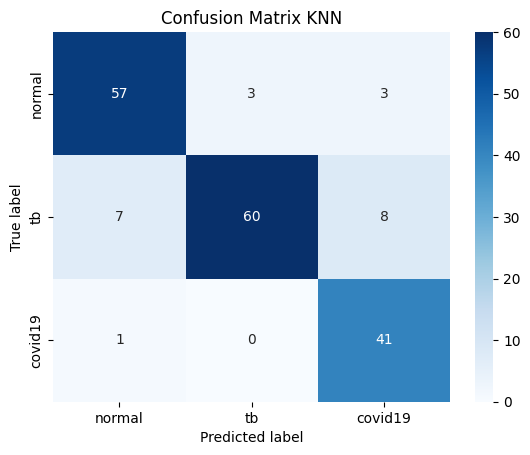

In [26]:
cm = confusion_matrix(ytest, pred_knn)
classes=['normal', 'tb', 'covid19']
sns.heatmap(cm, annot=True, xticklabels=classes, yticklabels=classes,cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix KNN')

Classification report KNN

In [27]:
from sklearn.metrics import classification_report
print(classification_report(ytest, pred_knn))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        63
           1       0.95      0.80      0.87        75
           2       0.79      0.98      0.87        42

    accuracy                           0.88       180
   macro avg       0.87      0.89      0.88       180
weighted avg       0.89      0.88      0.88       180



In [28]:
#plot roc multiclass
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from keras.utils import to_categorical

In [29]:
# Binarize the output
PRED = to_categorical(pred_knn, num_classes=3)
y = label_binarize(y_out, classes=[0,1,2])
n_classes = y.shape[1]

Y_test = to_categorical(ytest, num_classes=3)

False positive rate and True positive rate for AUC

In [30]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
       fpr[i], tpr[i], _ = roc_curve(Y_test[:,i], PRED[:,i])
       roc_auc[i] = auc(fpr[i], tpr[i])

ROC + AUC (KNN)

C:\Users\Zul\AppData\Local\Temp\ipykernel_14516\2215385453.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--',linestyle='--')


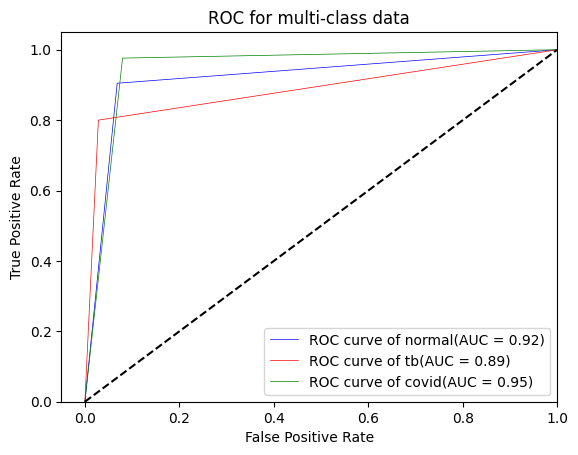

In [31]:
colors = ['blue', 'red', 'green']
cls = {0:'normal', 1:'tb', 2:'covid'}
for i, color ,c in zip(range(n_classes), colors, cls.values()):
    plt.plot(fpr[i], tpr[i], color=color, lw=0.5,
             label='ROC curve of '+c+ '(AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--',linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for multi-class data')
plt.legend(loc="lower right")
plt.show()

KNN with CV

In [32]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import roc_auc_score

In [33]:
x_ar = x_in.to_numpy()
y_ar = y_out.to_numpy()

In [34]:
# 5 fold cv

kf5_knn = KFold(n_splits = 5)

scores_knn = cross_val_score(knn, x_ar, y_ar, cv = kf5_knn)

print("Cross Validation Scores: ", scores_knn)
print("Average CV Score: ", scores_knn.mean())
print("Number of CV Scores used in Average: ", len(scores_knn))

Cross Validation Scores:  [0.70555556 0.91111111 0.47222222 0.93333333 0.69444444]
Average CV Score:  0.7433333333333334
Number of CV Scores used in Average:  5


In [35]:
# 10 fold cv

kf10_knn = KFold(n_splits = 10)

scores2_knn = cross_val_score(knn, x_ar, y_ar, cv = kf10_knn)

print("Cross Validation Scores: ", scores2_knn)
print("Average CV Score: ", scores2_knn.mean())
print("Number of CV Scores used in Average: ", len(scores2_knn))

Cross Validation Scores:  [0.42222222 1.         1.         0.82222222 0.66666667 0.66666667
 0.86666667 1.         0.9        0.77777778]
Average CV Score:  0.8122222222222224
Number of CV Scores used in Average:  10


Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth = 4, random_state = 0)
rfc.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=4, random_state=0)

In [37]:
preds_rf=rfc.predict(xtest)

In [38]:
print(accuracy_score(ytest, preds_rf))

0.9166666666666666


Confusion Matrix RF

Text(0.5, 1.0, 'Confusion Matrix RF')

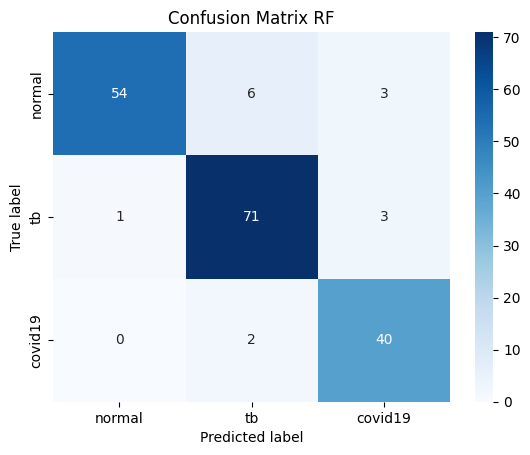

In [39]:
cm = confusion_matrix(ytest, preds_rf)
classes=['normal', 'tb', 'covid19']
sns.heatmap(cm, annot=True, xticklabels=classes, yticklabels=classes,cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix RF')

Classification report RF

In [40]:
from sklearn.metrics import classification_report
print(classification_report(ytest, preds_rf))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92        63
           1       0.90      0.95      0.92        75
           2       0.87      0.95      0.91        42

    accuracy                           0.92       180
   macro avg       0.92      0.92      0.92       180
weighted avg       0.92      0.92      0.92       180



In [41]:
# Binarize the output
PRED = to_categorical(preds_rf, num_classes=3)
y = label_binarize(y_out, classes=[0,1,2])
n_classes = y.shape[1]

Y_test = to_categorical(ytest, num_classes=3)

False positive rate and True positive rate for AUC

In [42]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
       fpr[i], tpr[i], _ = roc_curve(Y_test[:,i], PRED[:,i])
       roc_auc[i] = auc(fpr[i], tpr[i])

ROC + AUC (RF)

C:\Users\Zul\AppData\Local\Temp\ipykernel_14516\2215385453.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--',linestyle='--')


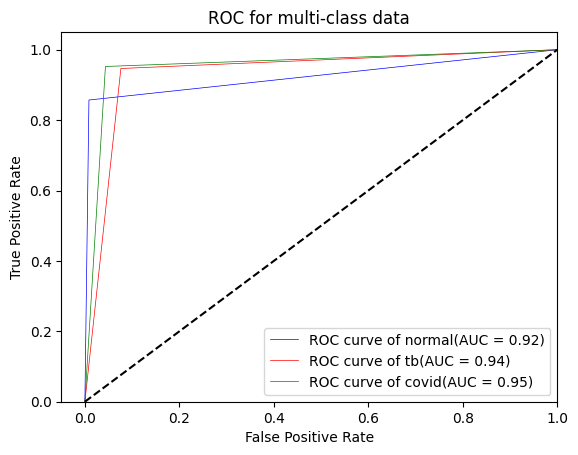

In [43]:
colors = ['blue', 'red', 'green']
cls = {0:'normal', 1:'tb', 2:'covid'}
for i, color ,c in zip(range(n_classes), colors, cls.values()):
    plt.plot(fpr[i], tpr[i], color=color, lw=0.5,
             label='ROC curve of '+c+ '(AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--',linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for multi-class data')
plt.legend(loc="lower right")
plt.show()

RF with CV

In [44]:
# 5 fold cv

kf5_RF = KFold(n_splits = 5)

scores_RF = cross_val_score(rfc, x_ar, y_ar, cv = kf5_RF)

print("Cross Validation Scores: ", scores_RF)
print("Average CV Score: ", scores_RF.mean())
print("Number of CV Scores used in Average: ", len(scores_RF))

Cross Validation Scores:  [0.68333333 0.96111111 0.47222222 0.88333333 0.28888889]
Average CV Score:  0.6577777777777778
Number of CV Scores used in Average:  5


In [45]:
# 10 fold cv

kf10_RF = KFold(n_splits = 10)

scores2_RF = cross_val_score(rfc, x_ar, y_ar, cv = kf10_RF)

print("Cross Validation Scores: ", scores2_RF)
print("Average CV Score: ", scores2_RF.mean())
print("Number of CV Scores used in Average: ", len(scores2_RF))

Cross Validation Scores:  [0.42222222 0.98888889 1.         0.88888889 0.77777778 0.85555556
 0.91111111 0.85555556 0.76666667 0.34444444]
Average CV Score:  0.781111111111111
Number of CV Scores used in Average:  10


ANN

In [46]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(solver='lbfgs',alpha=1e-5, random_state=0)
ann.fit(xtrain, ytrain)

MLPClassifier(alpha=1e-05, random_state=0, solver='lbfgs')

In [47]:
preds_ann=ann.predict(xtest)

In [48]:
print(accuracy_score(ytest, preds_ann))

0.9277777777777778


Confusion matrix ANN

Text(0.5, 1.0, 'Confusion Matrix ANN')

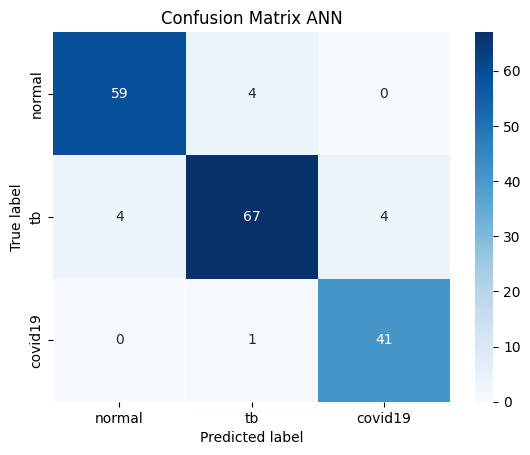

In [49]:
cm = confusion_matrix(ytest, preds_ann)
classes=['normal', 'tb', 'covid19']
sns.heatmap(cm, annot=True, xticklabels=classes, yticklabels=classes,cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix ANN')

In [50]:
print(classification_report(ytest, preds_ann))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        63
           1       0.93      0.89      0.91        75
           2       0.91      0.98      0.94        42

    accuracy                           0.93       180
   macro avg       0.93      0.94      0.93       180
weighted avg       0.93      0.93      0.93       180



In [51]:
# Binarize the output
PRED = to_categorical(preds_ann, num_classes=3)
y = label_binarize(y_out, classes=[0,1,2])
n_classes = y.shape[1]

Y_test = to_categorical(ytest, num_classes=3)

In [52]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
       fpr[i], tpr[i], _ = roc_curve(Y_test[:,i], PRED[:,i])
       roc_auc[i] = auc(fpr[i], tpr[i])

C:\Users\Zul\AppData\Local\Temp\ipykernel_14516\2215385453.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--',linestyle='--')


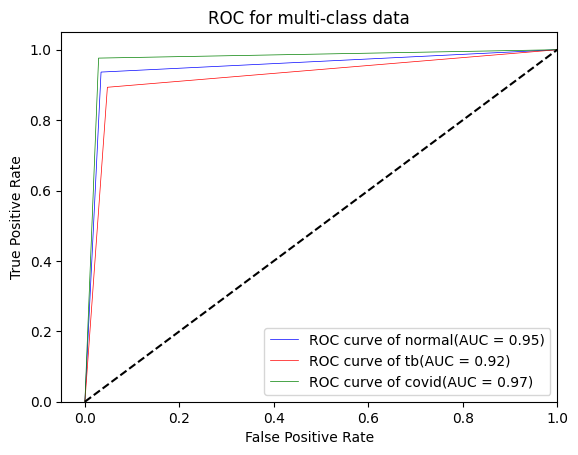

In [53]:
colors = ['blue', 'red', 'green']
cls = {0:'normal', 1:'tb', 2:'covid'}
for i, color ,c in zip(range(n_classes), colors, cls.values()):
    plt.plot(fpr[i], tpr[i], color=color, lw=0.5,
             label='ROC curve of '+c+ '(AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--',linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for multi-class data')
plt.legend(loc="lower right")
plt.show()

ANN with CV

In [54]:
# 5 fold cv

kf5_ann= KFold(n_splits = 5)

scores_ann = cross_val_score(ann, x_ar, y_ar, cv = kf5_ann)

print("Cross Validation Scores: ", scores_ann)
print("Average CV Score: ", scores_ann.mean())
print("Number of CV Scores used in Average: ", len(scores_ann))

Cross Validation Scores:  [0.69444444 0.97222222 0.81666667 0.93888889 0.4       ]
Average CV Score:  0.7644444444444445
Number of CV Scores used in Average:  5


In [55]:
# 10 fold cv

kf10_ann = KFold(n_splits = 10)

scores2_ann = cross_val_score(ann, x_ar, y_ar, cv = kf10_ann)

print("Cross Validation Scores: ", scores2_ann)
print("Average CV Score: ", scores2_ann.mean())
print("Number of CV Scores used in Average: ", len(scores2_ann))

Cross Validation Scores:  [0.42222222 1.         0.98888889 0.97777778 0.84444444 0.88888889
 0.87777778 0.98888889 0.84444444 0.72222222]
Average CV Score:  0.8555555555555555
Number of CV Scores used in Average:  10
